# Lab 2: More ggplot and dplyr

Derek Hansen (credit to Jing Ouyang; all mistakes are my own)

## Annoucments

1. We encourage you to be active on Piazza, asking and answering homework questions.
1. When asking a homework question, gather all relevant information to your problem **to make it reproduceable**
   -  What operating system are you using (Windows/Mac)
   -  What version of R are you using?
   -  What versions of packages are you using? (run ```sessionInfo()``` after loading packages to see)
   -  What code did you run before running into your problem?
   -  What does the output say?
   -  Take a screenshot or picture for best results
   -  Bonus: Piazza lets you upload files, so upload your Jupyter notebook to help us help you
1. Demo on homework submission.
1. Demo on Zoom links 

## Review : Lab 1 Exercise
Question 1: What is the default value of the mean and standard deviation used by the ```rnorm``` function in R to generate a value from a normal distribution?

Answer: ```?rnorm``` will tell you that the mean is $0$ and the standard deviation is $1$.

In [122]:
library(tidyverse)

Question 2: Create a boxplot of ```price``` grouped by the levels in the ```cut``` variable.

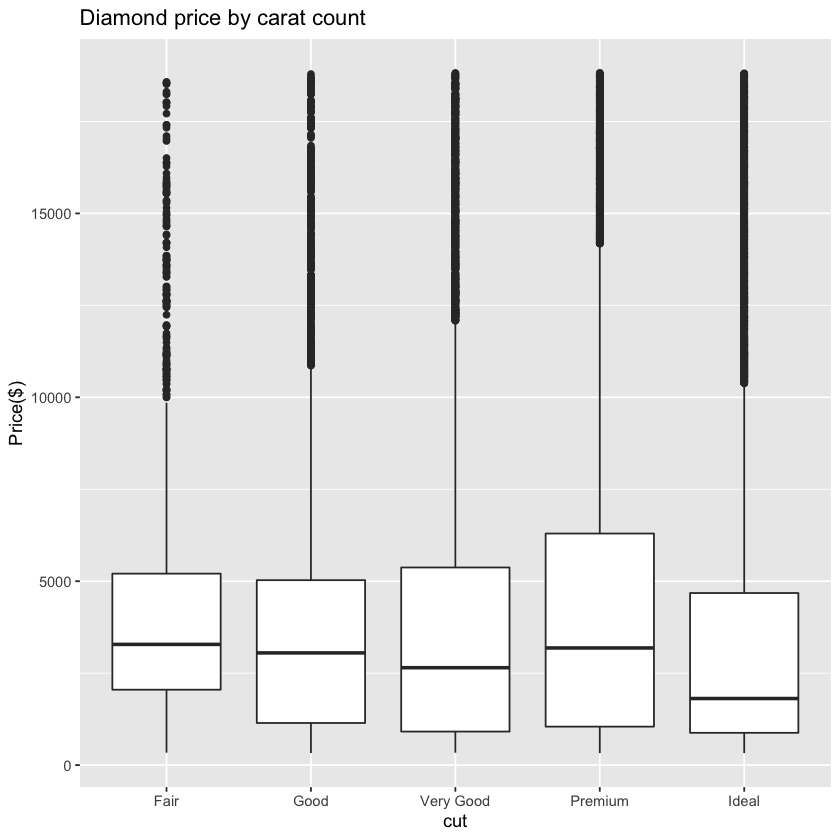

In [123]:
# boxplot helps to visualize the variability of a price for each cut
ggplot(data = diamonds) + 
    geom_boxplot(mapping = aes(x = cut, y = price)) +
    labs(x = 'cut', y = 'Price($)') + 
    ggtitle('Diamond price by carat count')

### Facets
-  Facets create subplots which are group by a specified variable.
-  ```facet_wrap``` takes one variable in the formula ```~vars``` and will wrap it to best fit the plotting area
-  ```facet_grid``` forms a grid of subplots with the formula ```rows~columns```

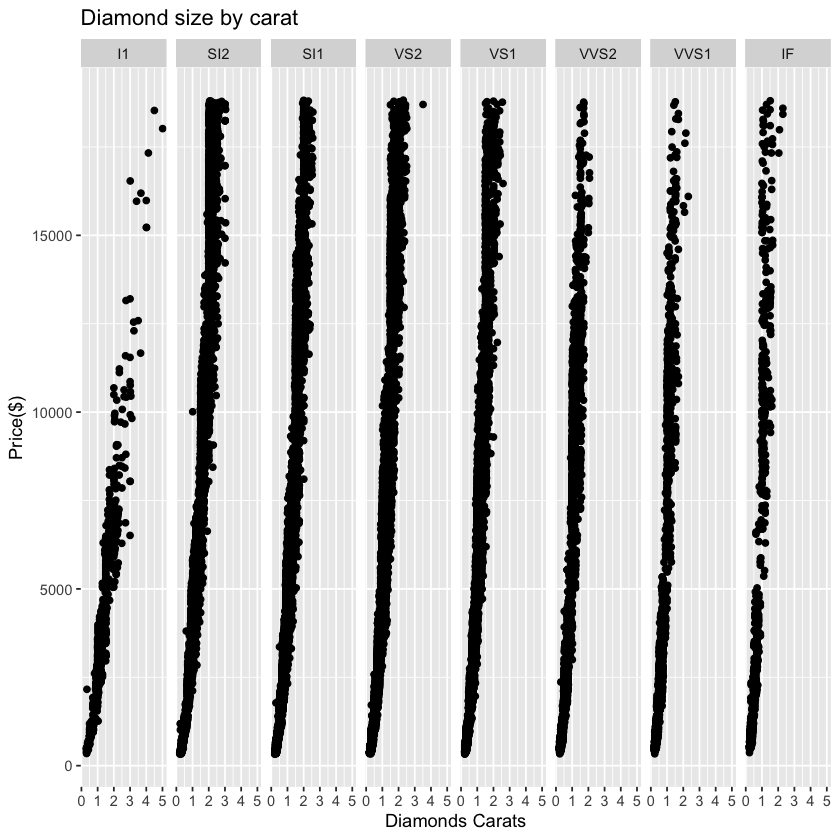

In [124]:
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_grid(.~clarity) 


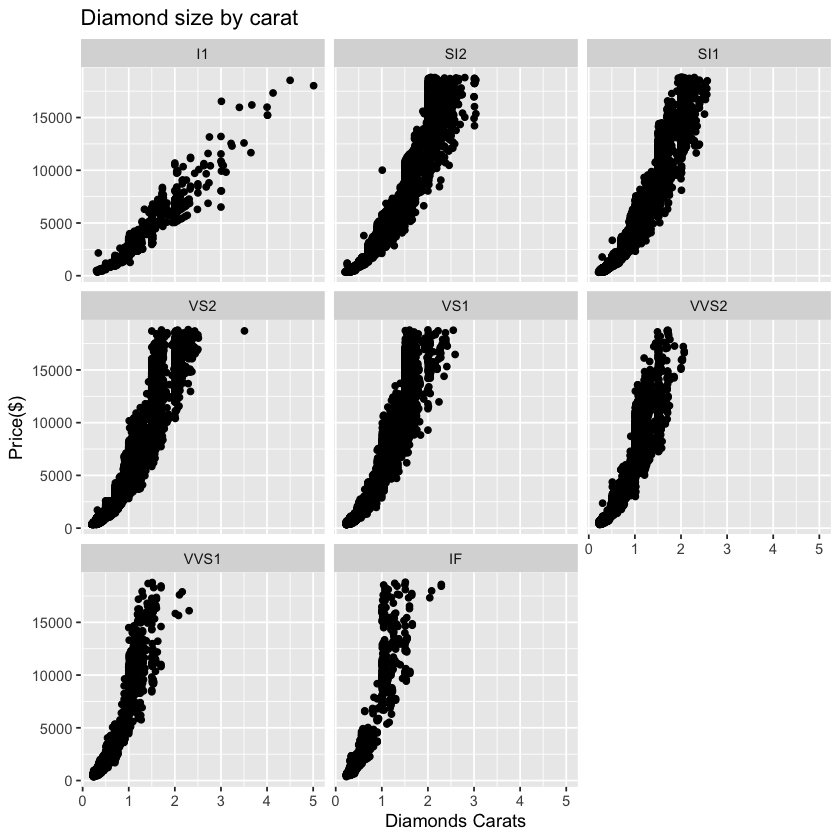

In [125]:
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_wrap(~clarity) 


## Subset generation

-  Say we want to take a random subset of diamonds

In [126]:
nrow(diamonds)

[1] 53940

## Sampling
-  We can use the ```sample``` function in R to randomly sample from a list of numbers from 1 to 53940
-  This sample can then be used to index the diamonds dataset

In [127]:
rand_idx = sample(x = 1:nrow(diamonds), # What we're sampling from,
       size = 1000, # How many to sample
       replace = TRUE) # After we sample one number, do we place it back in the population (TRUE) or remove it (FALSE)
head(rand_idx)

[1] 46136 49352 20077 45494 53062  4533

In [128]:
dm = diamonds[rand_idx, ]
print(names(dm))
print(dim(dm))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      
[1] 1000   10


In [129]:
summary(dm)

     carat               cut      color      clarity        depth      
 Min.   :0.2100   Fair     : 40   D:127   VS2    :246   Min.   :43.00  
 1st Qu.:0.4100   Good     : 91   E:179   SI1    :231   1st Qu.:61.10  
 Median :0.7100   Very Good:207   F:197   SI2    :171   Median :61.90  
 Mean   :0.8081   Premium  :249   G:199   VS1    :156   Mean   :61.82  
 3rd Qu.:1.0500   Ideal    :413   H:139   VVS2   : 91   3rd Qu.:62.60  
 Max.   :2.6000                   I:102   VVS1   : 61   Max.   :72.90  
                                  J: 57   (Other): 44                  
     table           price             x               y        
 Min.   :49.00   Min.   :  373   Min.   :3.840   Min.   :3.820  
 1st Qu.:56.00   1st Qu.: 1016   1st Qu.:4.770   1st Qu.:4.780  
 Median :57.00   Median : 2604   Median :5.740   Median :5.725  
 Mean   :57.33   Mean   : 4021   Mean   :5.763   Mean   :5.764  
 3rd Qu.:59.00   3rd Qu.: 5395   3rd Qu.:6.562   3rd Qu.:6.562  
 Max.   :69.00   Max.   :18559   M

In [130]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## More about Facets

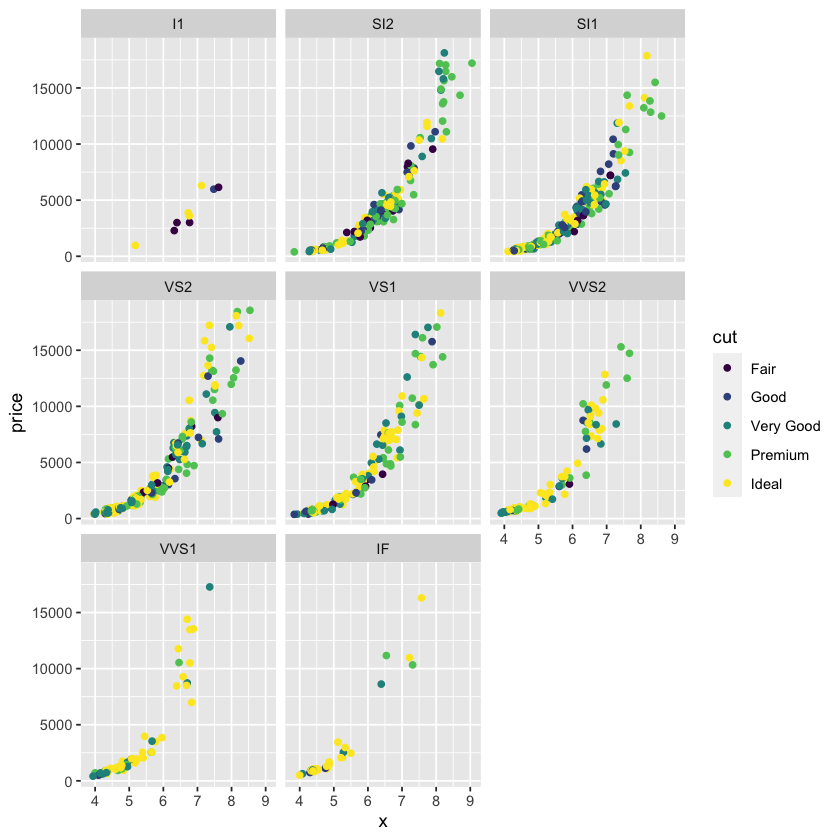

In [131]:
p1 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price, color = cut)) + 
    facet_wrap(~clarity)
print(p1)

## geom_smooth
-  Scatterplots can be useful as a quick glance at the data, but so many points can often be distracting.
-  The ```geom_smooth``` function automatically fits a curve with standard-error bounds on the estimated mean function

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



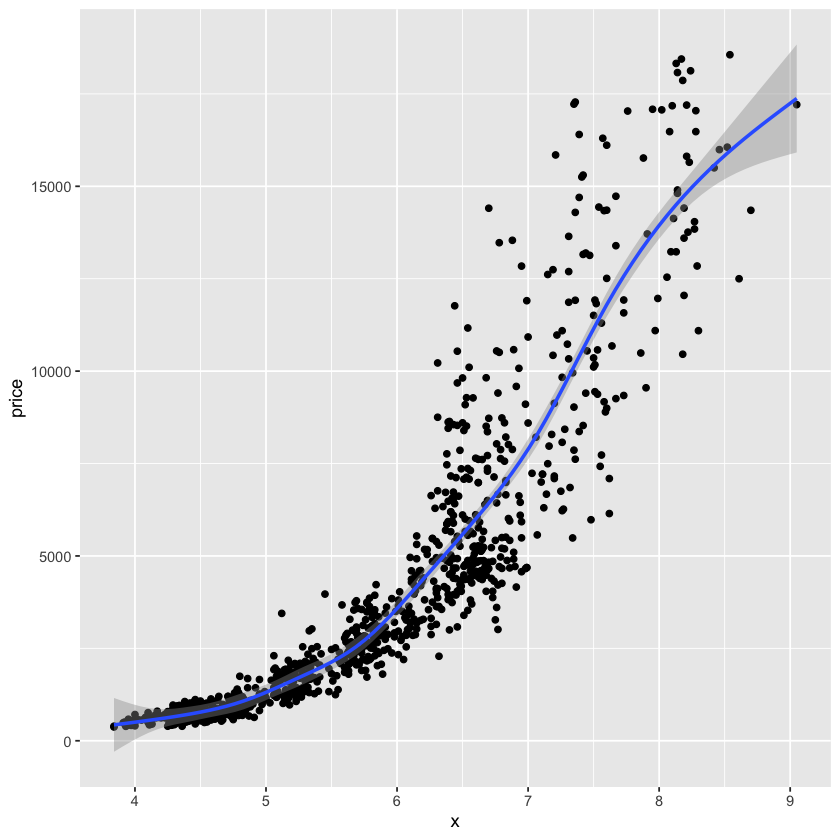

In [132]:
p2 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price)) +
    geom_smooth(mapping = aes(x = x, y = price))
print(p2)

In [133]:
?geom_smooth


How can we reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



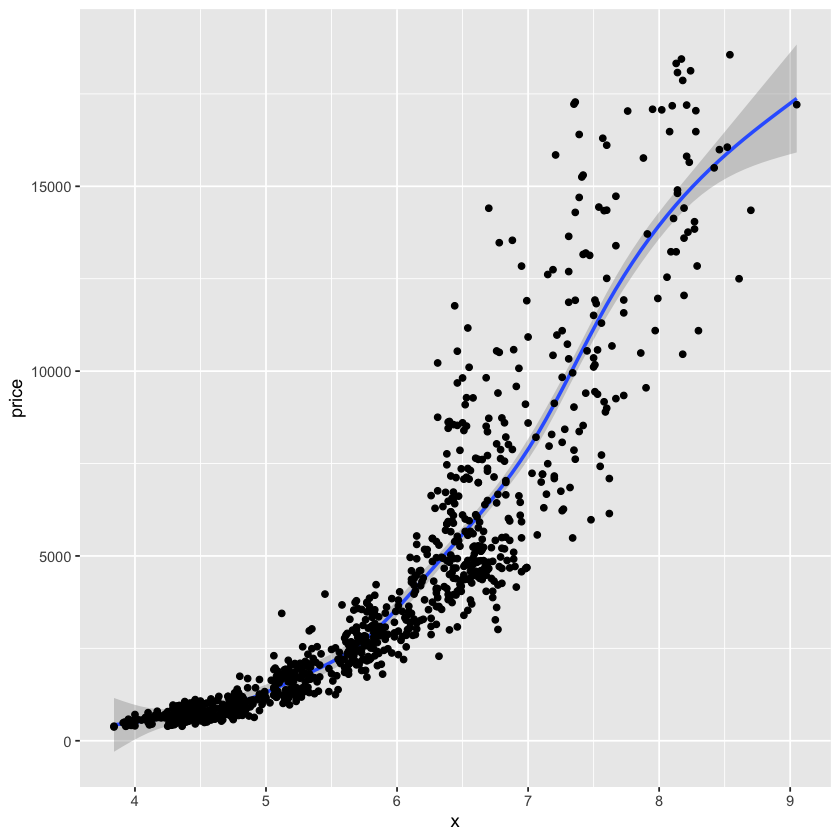

In [134]:
ggplot(data = dm, mapping = aes(x = x, y= price)) + 
  geom_smooth() + geom_point()

## Geometric Plots
-  Many graphs, like scatterplots and lines, plot the raw values of your dataset. (```geom_point```, ```geom_line```)
-  Other graphs, like bar charts, calculate new values to plot. (```geom_bar```, ```geom_smooth```)
-  You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().
-  stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.
-  Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [135]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)
popn

country,population
ETHIOPIA,1.02e+08
NIGERIA,1.86e+08
EGYPT,9.60e+07
DR CONGO,7.80e+07
SOUTH AFRICA,5.60e+07


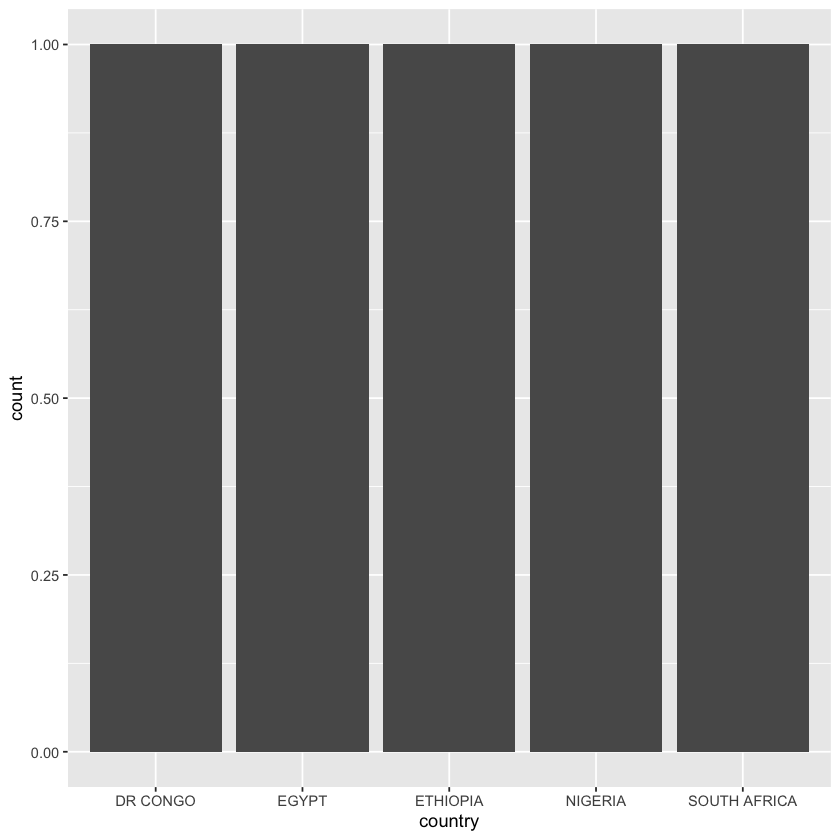

In [136]:
ggplot(popn) + geom_bar(aes(x=country))

ERROR while rich displaying an object: Error: stat_count() can only have an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

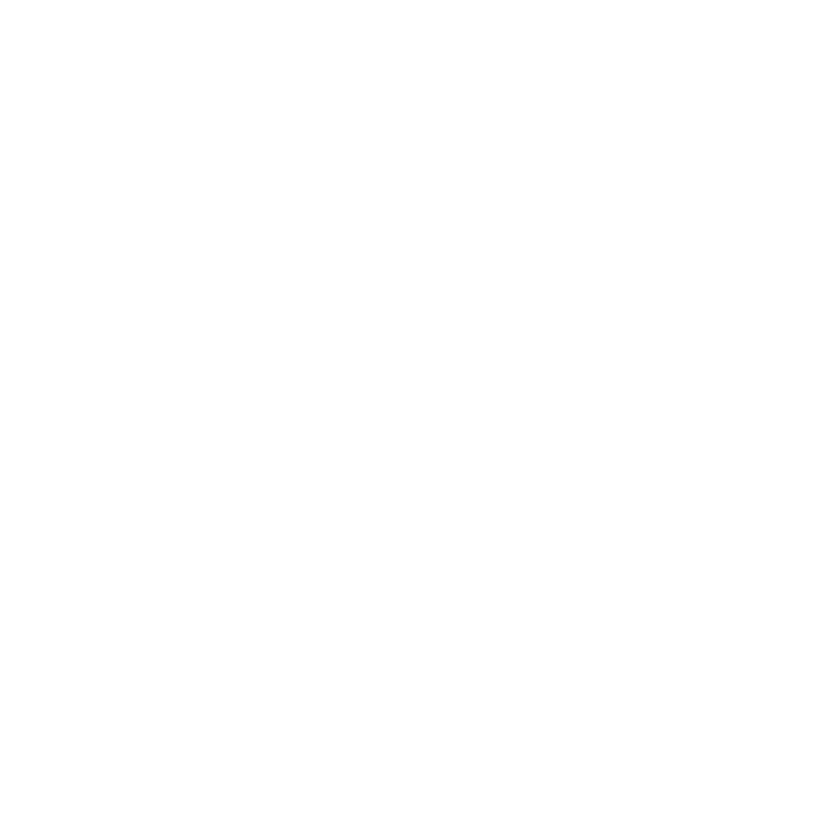

In [137]:
ggplot(popn) + geom_bar(aes(x=country, y=population))

$title
[1] "Most populous countries in Africa"

attr(,"class")
[1] "labels"

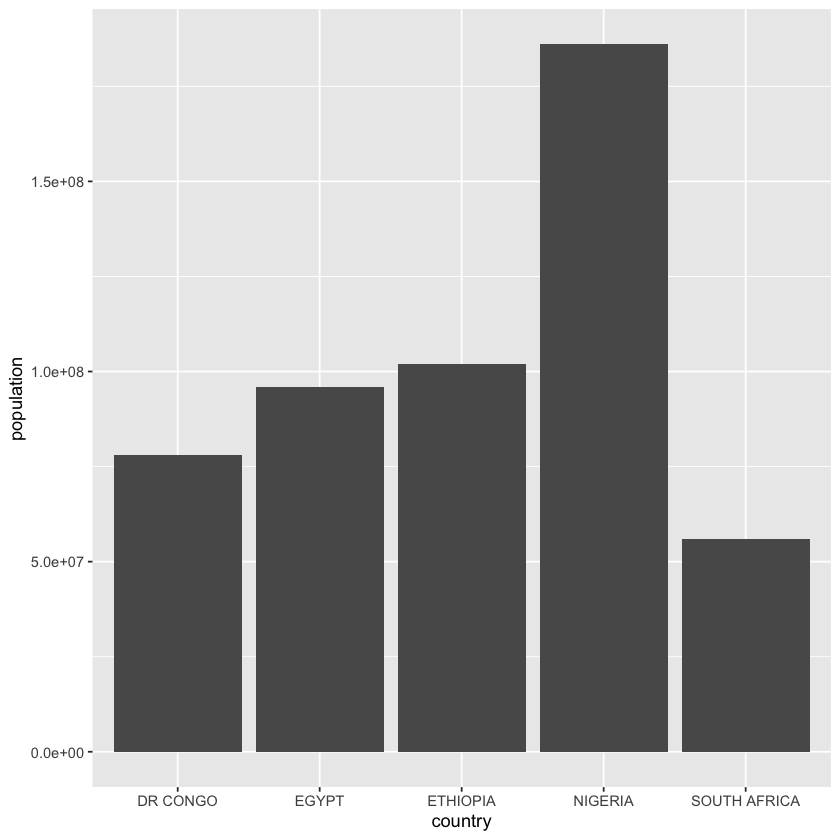

In [138]:
ggplot(data = popn) +
  geom_bar(mapping = aes(x = country, y = population), stat = "identity")
  ggtitle('Most populous countries in Africa')

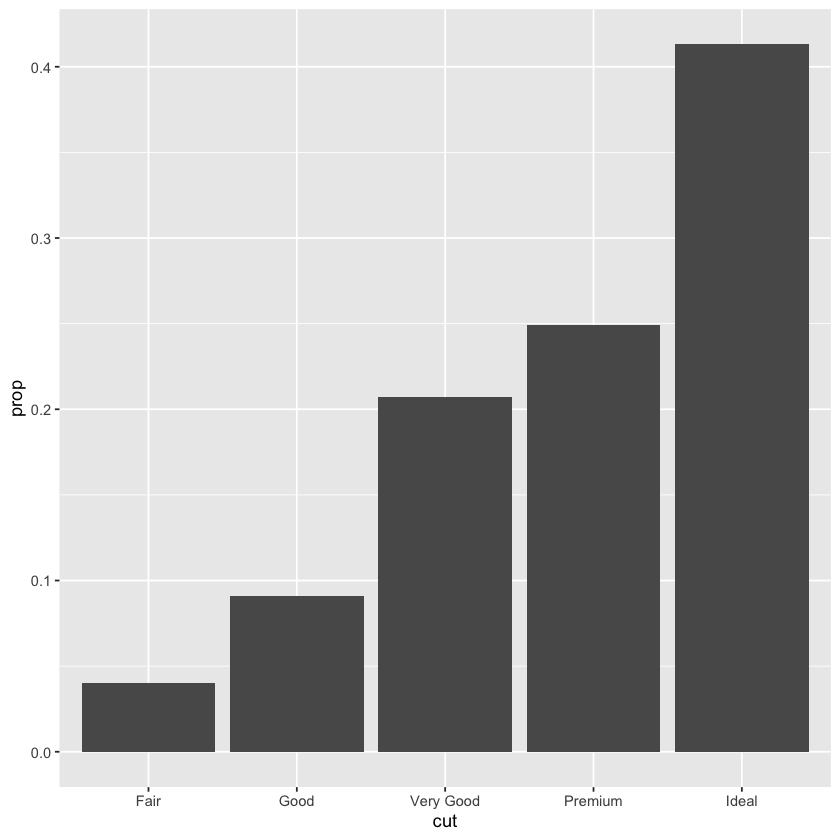

In [139]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group=1))

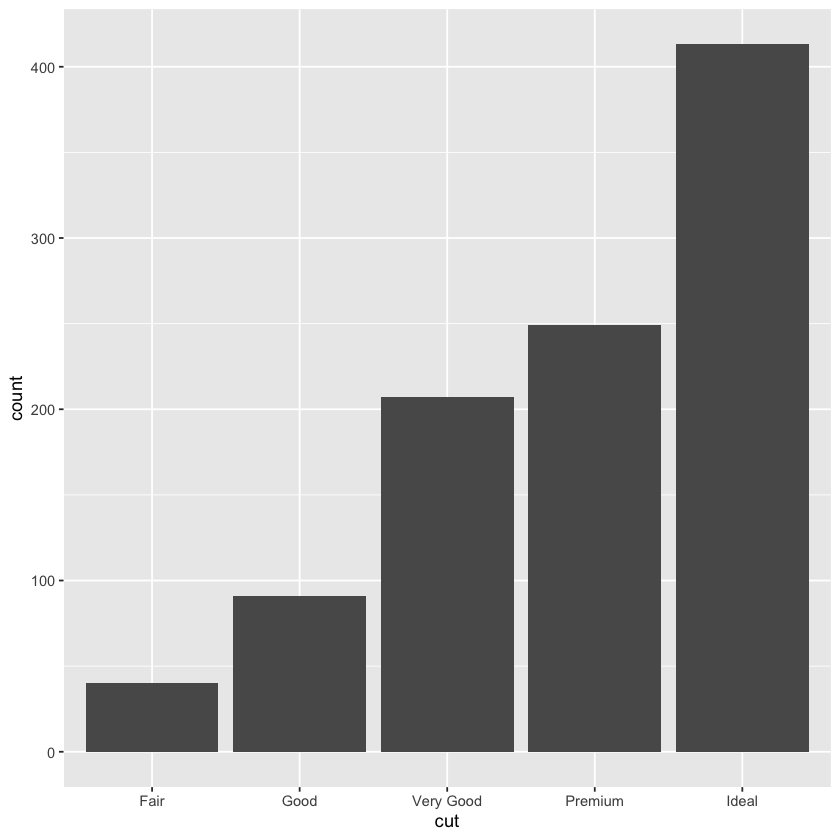

In [140]:
ggplot(data = dm) +
    stat_count(mapping = aes(x = cut))

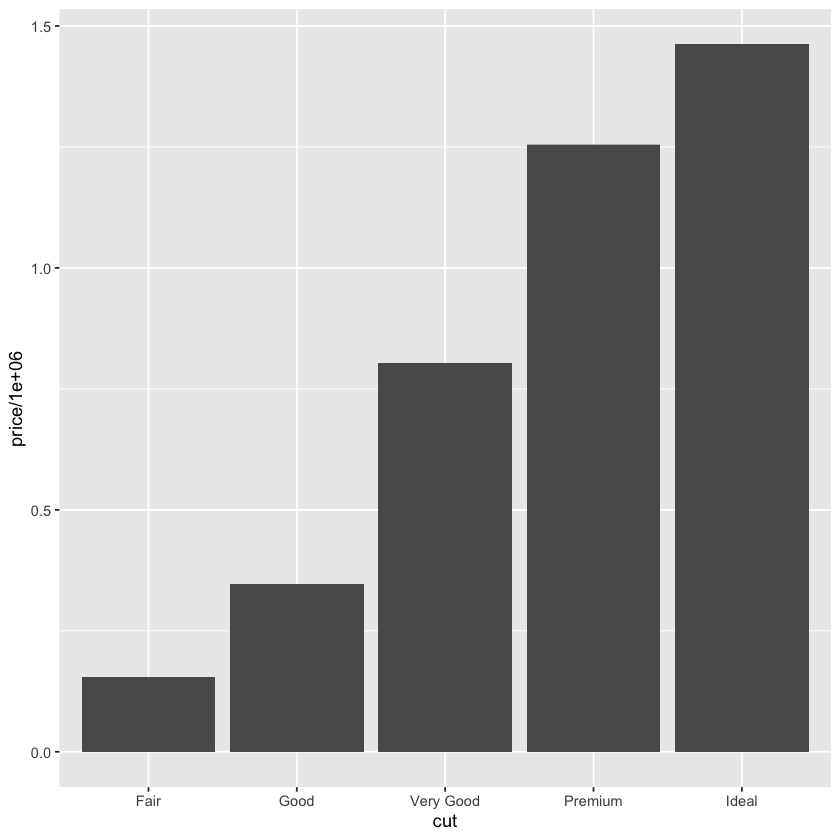

In [141]:
ggplot(data = dm) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

-  A ```geom_``` function is tied to specific plot, with a modifiable underlying stat
  -  e.g. ```geom_bar``` and ```geom_col``` only differ in their default underlying stat ("count and "identity" respectively)
-  A ```stat_``` function is tied to a specific statistical transformation, with a modifiable geom (i.e. plot)
  - e.g. ```stat_count``` has a default geom of "bar", but this can be overridden if we want to display count data differently

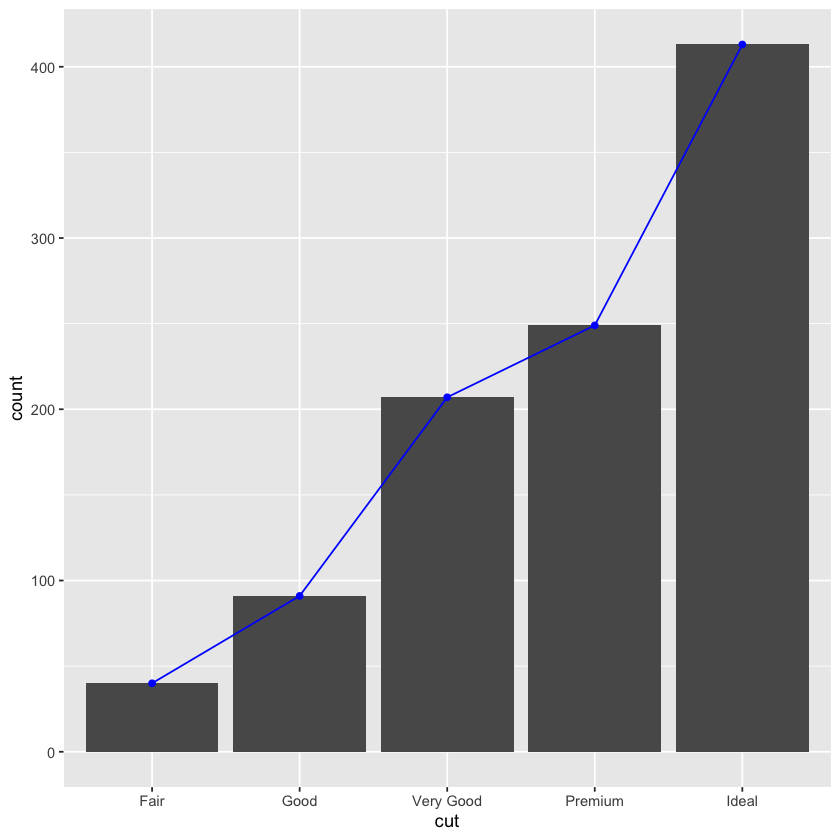

In [142]:
ggplot(data = dm) +
    stat_count(mapping = aes(x = cut, group=1)) + 
    stat_count(mapping = aes(x = cut, group=1), geom="point", color="blue") + 
    stat_count(mapping = aes(x = cut, group=1), geom="line", color="blue")

### Exercise
1. What does geom_col() do? How is it different to geom_bar()?
1. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
1. What variables does stat_smooth() compute? What parameters control its behaviour?
1. In our proportion bar chart, we need to set group = 1. Why? In other words, what is the problem with these two graphs?

## More settings: fill, color, and position
-  "fill" corresponds to the color of the volume within a geom
-  "color" corresponds to the color of the lines bordering a geom

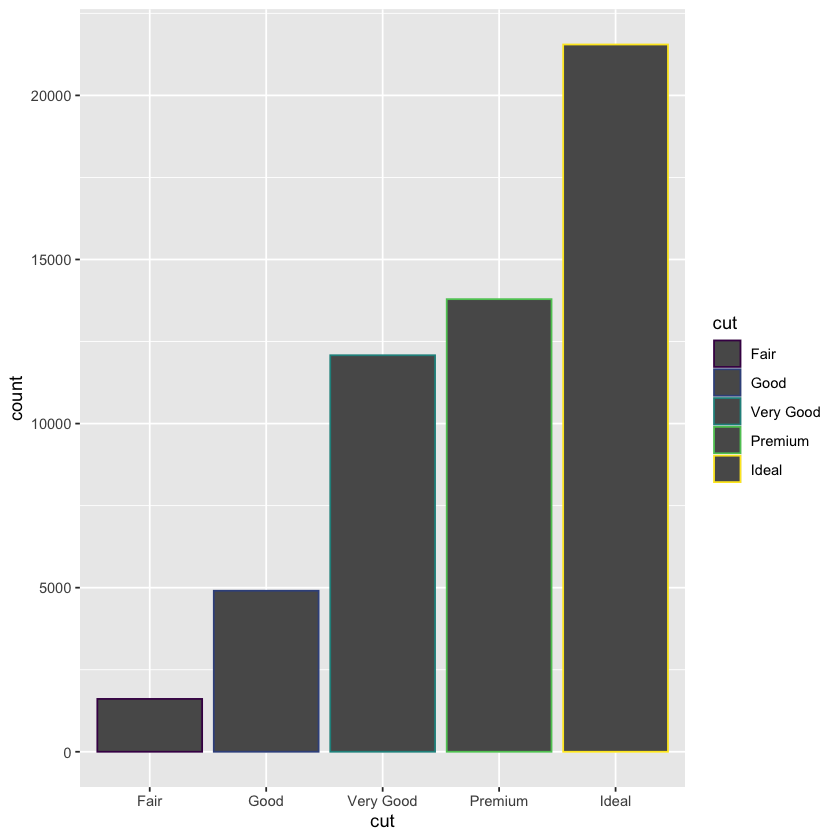

In [143]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))

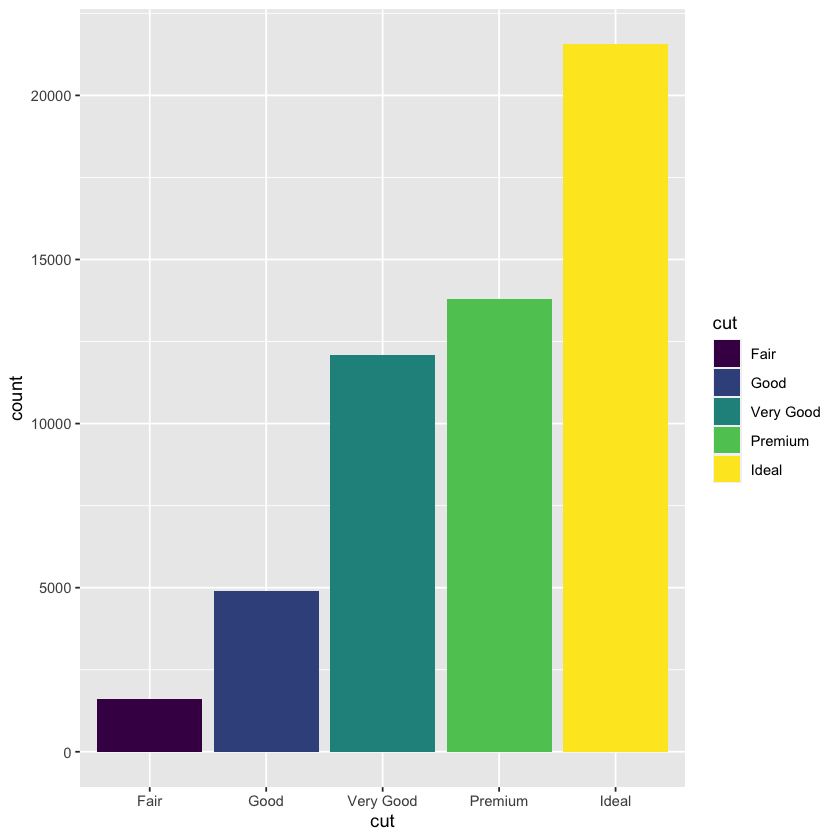

In [144]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

-  Remember that we can "color by" a different variable - in this case, clarity. 
-  By default, it stacks the bars for each clarity level. 
-  This is done using the positional adjustment specified by the position argument of geom_bar. 
-  If you don't want a stacked bar chart, you can use one of three other options: 
  -  "identity"
  -  "dodge"
  -  "fill

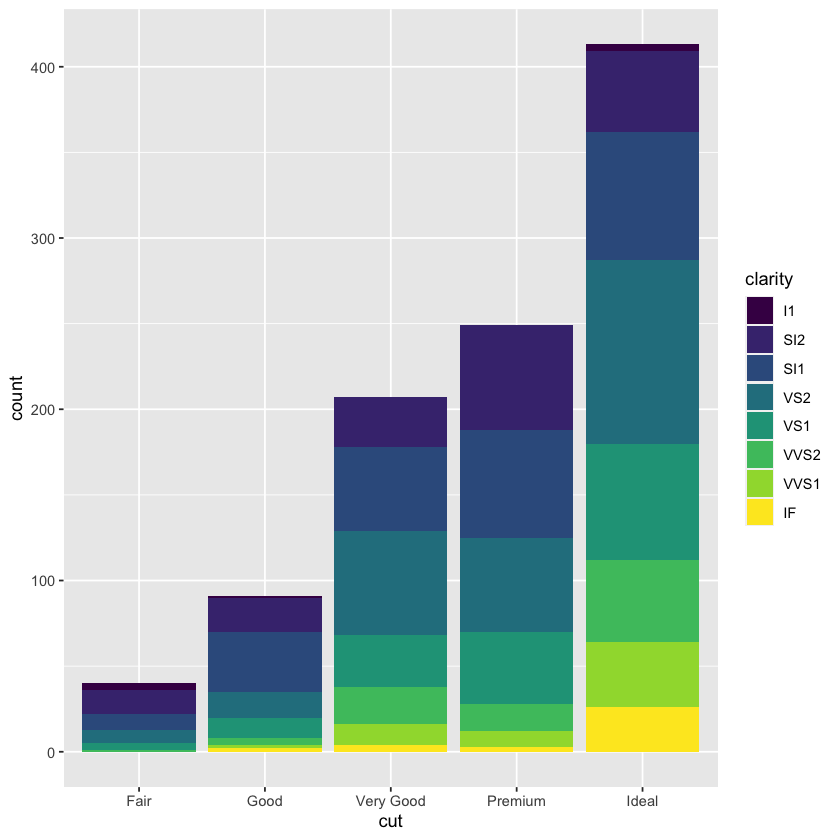

In [145]:
ggplot(data = dm) +
    geom_bar(mapping = aes(x = cut, fill = clarity)) # this "fill" is different from the following one.

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

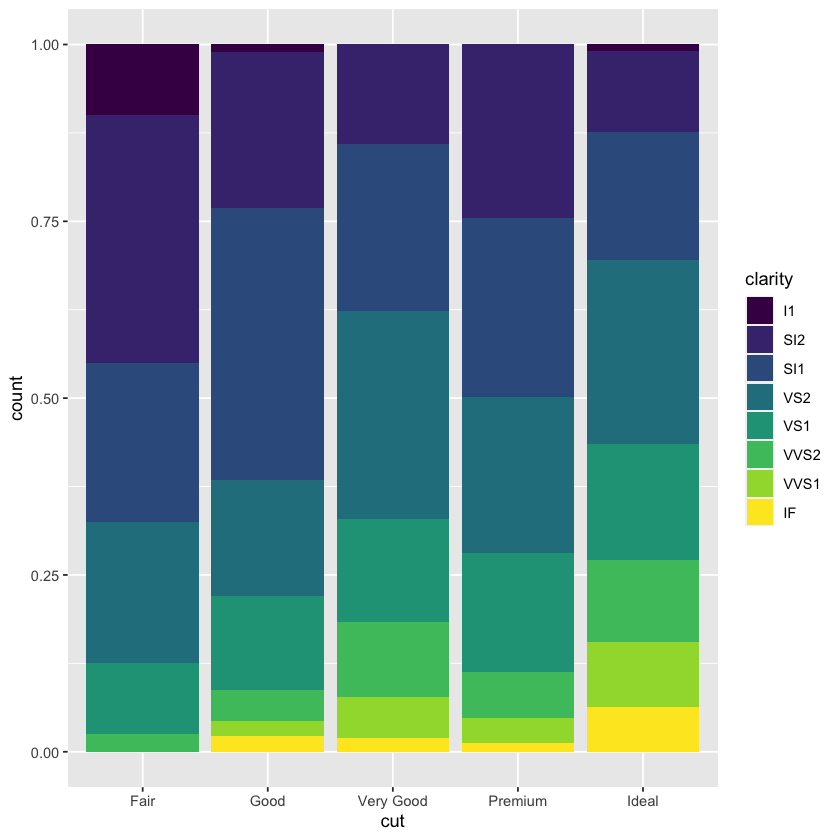

In [146]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

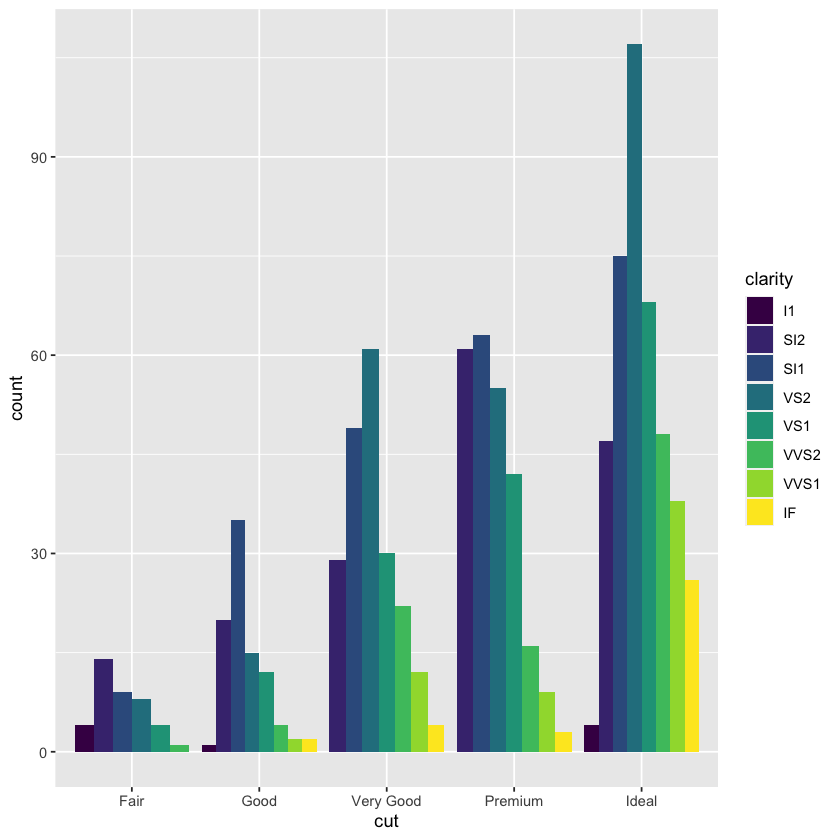

In [147]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

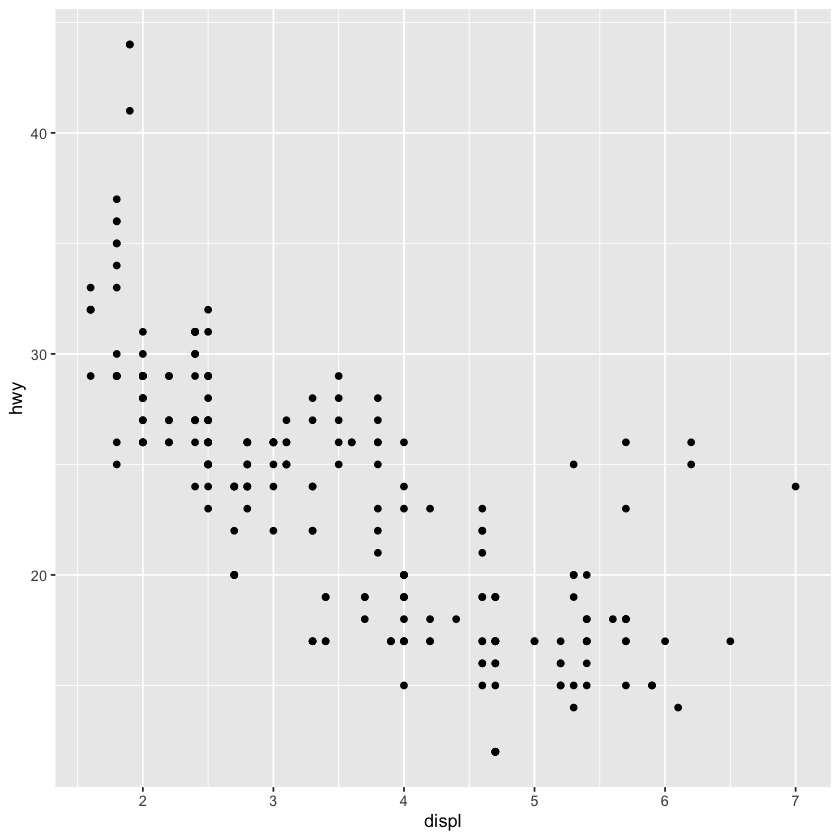

In [148]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

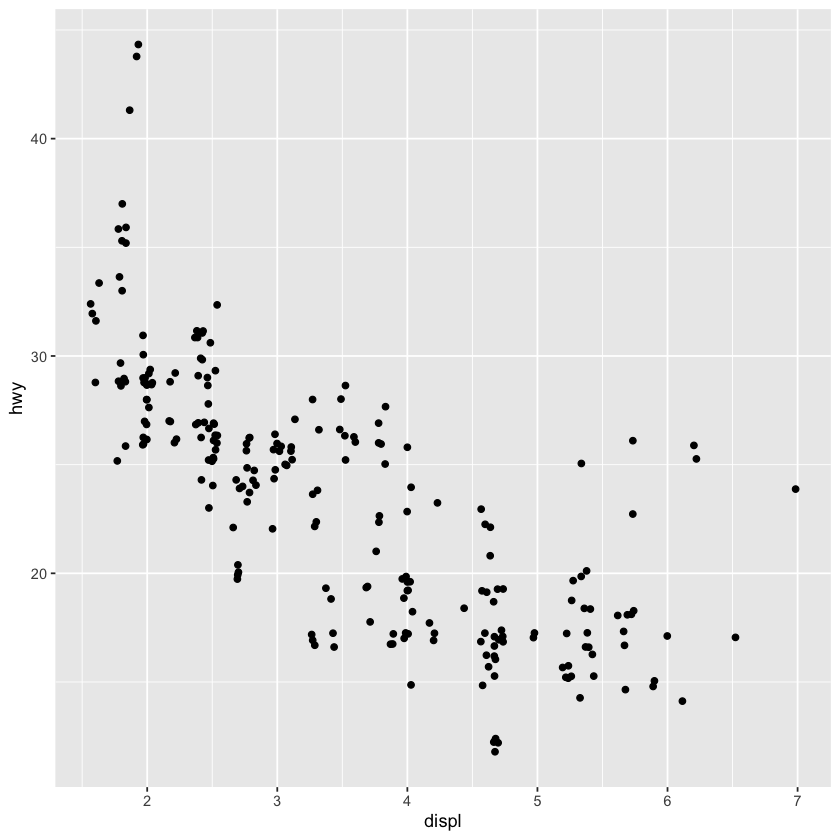

In [149]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")



# dplyr for data manipulation

In [150]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
0.41,Ideal,E,VVS1,61.1,56,1745,4.80,4.82,2.94
0.54,Ideal,H,IF,60.9,57,2096,5.26,5.31,3.22
1.00,Very Good,F,VVS2,60.0,62,8553,6.43,6.46,3.87
0.52,Ideal,D,VS2,62.0,56,1679,5.17,5.19,3.21
0.75,Good,D,SI1,64.1,54,2608,5.78,5.76,3.70
0.91,Premium,E,SI2,62.8,61,3639,6.09,6.07,3.82


There are five main functions in dplyr: 
 -  filter
 -  arrange
 -  select
 -  mutate
 -  summarise. 
 
All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame
3. The result is a new data frame.

## Filter
Used if you want to create a new dataset only containing rows which pass a given condition.

Note: Make sure to use '==' instead of '=' when checking equality.

In [151]:
worst_diamonds <- filter(dm, cut == 'Fair', color == 'J')
worst_diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
1.03,Fair,J,SI2,64.6,62,3149,6.3,6.21,4.06


## More examples

In [152]:
a = filter(dm, cut == 'Fair'| color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

best_cuts = filter(dm, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(dm, cut > 'Fair') 
# can do this because cut is an ordinal variable

In [153]:
head(not_worst_cuts)

carat,cut,color,clarity,depth,table,price,x,y,z
0.41,Ideal,E,VVS1,61.1,56,1745,4.80,4.82,2.94
0.54,Ideal,H,IF,60.9,57,2096,5.26,5.31,3.22
1.00,Very Good,F,VVS2,60.0,62,8553,6.43,6.46,3.87
0.52,Ideal,D,VS2,62.0,56,1679,5.17,5.19,3.21
0.75,Good,D,SI1,64.1,54,2608,5.78,5.76,3.70
0.91,Premium,E,SI2,62.8,61,3639,6.09,6.07,3.82


## Missing Values and TRUE/FALSE

- In R, if there is a chance that a value equals NA, use the is.na() function to check
- In particular, do not check for equality with NA, because this won't be true or false, but NA

In [154]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [155]:
head(arrange(dm, cut, color))
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
1.01,Fair,D,SI2,64.7,57,3871,6.31,6.27,4.07
0.90,Fair,D,SI2,65.7,60,3205,5.98,5.93,3.91
0.53,Fair,E,SI1,64.5,53,1363,5.16,5.15,3.33
0.45,Fair,E,VS2,65.8,58,951,4.81,4.74,3.14
0.41,Fair,E,SI2,64.7,55,818,4.70,4.67,3.03
0.72,Fair,E,SI2,68.4,64,2125,5.38,5.32,3.66


In [156]:
# arranging in the descending order of carat and then cut
head(arrange(dm,desc(carat), cut))

carat,cut,color,clarity,depth,table,price,x,y,z
2.60,Premium,J,SI2,58.3,61,17209,9.05,8.94,5.24
2.55,Premium,I,SI2,62.9,58,14351,8.70,8.59,5.44
2.38,Premium,J,VS2,62.1,58,18559,8.54,8.49,5.29
2.37,Ideal,J,VS2,62.2,57,16059,8.52,8.58,5.32
2.30,Premium,J,SI1,59.6,59,12499,8.61,8.56,5.12
2.30,Premium,H,SI2,62.7,56,15992,8.46,8.42,5.29


Missing values are always sorted at the end:

In [157]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
2
5
NA


In [158]:
arrange(df, desc(x))

x
5
2
NA


### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [159]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [160]:
head(select(dm, carat, price))

carat,price
0.41,1745
0.54,2096
1.00,8553
0.52,1679
0.75,2608
0.91,3639


In [161]:
head(select(dm, carat:price))

carat,cut,color,clarity,depth,table,price
0.41,Ideal,E,VVS1,61.1,56,1745
0.54,Ideal,H,IF,60.9,57,2096
1.00,Very Good,F,VVS2,60.0,62,8553
0.52,Ideal,D,VS2,62.0,56,1679
0.75,Good,D,SI1,64.1,54,2608
0.91,Premium,E,SI2,62.8,61,3639


In [162]:
head(select(dm, -(carat:price)))

x,y,z
4.80,4.82,2.94
5.26,5.31,3.22
6.43,6.46,3.87
5.17,5.19,3.21
5.78,5.76,3.70
6.09,6.07,3.82


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [163]:
head(rename(dm, width=x))

carat,cut,color,clarity,depth,table,price,width,y,z
0.41,Ideal,E,VVS1,61.1,56,1745,4.80,4.82,2.94
0.54,Ideal,H,IF,60.9,57,2096,5.26,5.31,3.22
1.00,Very Good,F,VVS2,60.0,62,8553,6.43,6.46,3.87
0.52,Ideal,D,VS2,62.0,56,1679,5.17,5.19,3.21
0.75,Good,D,SI1,64.1,54,2608,5.78,5.76,3.70
0.91,Premium,E,SI2,62.8,61,3639,6.09,6.07,3.82


In [164]:
head(select(dm, width = x))

width
4.80
5.26
6.43
5.17
5.78
6.09


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [165]:
head(select(dm, price, carat, everything()))

price,carat,cut,color,clarity,depth,table,x,y,z
1745,0.41,Ideal,E,VVS1,61.1,56,4.80,4.82,2.94
2096,0.54,Ideal,H,IF,60.9,57,5.26,5.31,3.22
8553,1.00,Very Good,F,VVS2,60.0,62,6.43,6.46,3.87
1679,0.52,Ideal,D,VS2,62.0,56,5.17,5.19,3.21
2608,0.75,Good,D,SI1,64.1,54,5.78,5.76,3.70
3639,0.91,Premium,E,SI2,62.8,61,6.09,6.07,3.82


There are some helper functions for select():
-  ```starts_with("xyz")```: any column that starts with "xyz"
-  ```ends_with("xyz")```: any column that ends with "xyz"
-  ```contains("xyz")```: any column that contains "xyz"
    

### Exercise:
1. Write code that will have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

### Mutate
```mutate()``` is used to create a new column as a function of other columns in the dataset.

In [166]:
dm_dimensions = select(dm, 
  -(carat:price)
)
head(mutate(dm_dimensions,
  volume = x*y*z
))

x,y,z,volume
4.80,4.82,2.94,68.01984
5.26,5.31,3.22,89.93653
6.43,6.46,3.87,160.75129
5.17,5.19,3.21,86.13168
5.78,5.76,3.70,123.18336
6.09,6.07,3.82,141.21127


If you only want to keep the new variables, use transmute()

In [167]:
head(transmute(dm_dimensions, 
          volume = x*y*z))

volume
68.01984
89.93653
160.75129
86.13168
123.18336
141.21127



## Summarise
Generally used in concert with group_by() function to output summaries by group. Group summaries are seen in many applications

In [168]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



color,avg_price
D,3426.551
E,2780.503
F,3700.203
G,4279.628
H,4495.496
I,5263.480
J,6067.912


In [169]:
by_maker_yr = group_by(mpg, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
head(hwy_summary)

`summarise()` regrouping output by 'manufacturer' (override with `.groups` argument)



manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


## Pipes
-  Often times we create intermediate data frames which are not needed for the final output
-  We can use the **pipe** operator (```%>%```) to succinctly chain together functions
-  ```x %>% f(y,z)``` is equivalent to ```f(x, y, z)```
-  The transformations above can rewritten with the pipe


In [170]:
hwy_summary_ag2 = mpg %>% 
    group_by(manufacturer, year) %>%
    summarise(
        count = n(),
        hwy = mean(hwy, na.rm = TRUE),
        cty = mean(cty, na.rm = TRUE)) %>%
    filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

`summarise()` regrouping output by 'manufacturer' (override with `.groups` argument)



In [171]:
head(hwy_summary_ag2)

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
